**Car Dataset**
    
+ Download Dataset: https://archive.ics.uci.edu/ml/datasets/car+evaluation

**Attributes Info**

&ensp;&ensp; Class Values:
+ unacc, acc, good, vgood

&ensp;&ensp; Attributes:
+ buying: Vhigh, high, med, low
+ maint: vhigh, high, med, low
+ doors: 2, 3, 4, 5
+ persons: 2, 4, more.
+ lug_boot: small, med, big
+ safety: low, med, high

In [ ]:
# load EDA and data visualization packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
"""loading Machine Learning Packages"""

"""Logistic"""
from sklearn.linear_model import LogisticRegression

"""Navie Bayes"""
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
#from sklearn.naive_bayes import CategoricalNB

"""Random Forest"""
from sklearn.ensemble import RandomForestClassifier

"""MultiLayer Perceptron"""
from sklearn.neural_network import MLPClassifier

In [3]:
"""metrics"""
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [4]:
col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']

"""Load Data set"""
df = pd.read_csv('dataset/car.data', names=col_names)

In [7]:
df.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [8]:
df.describe()

,buying,maint,doors,persons,lug_boot,safety,class
count,1728,1728,1728,1728,1728,1728,1728
unique,4,4,4,3,3,3,4
top,vhigh,vhigh,2,2,small,low,unacc
freq,432,432,432,576,576,576,1210


In [9]:
df.shape

(1728, 7)

In [45]:
#check for missing values
df.isnull().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64

In [11]:
df['class'].value_counts()

unacc    1210
acc       384
good       69
vgood      65
Name: class, dtype: int64

<Axes: >

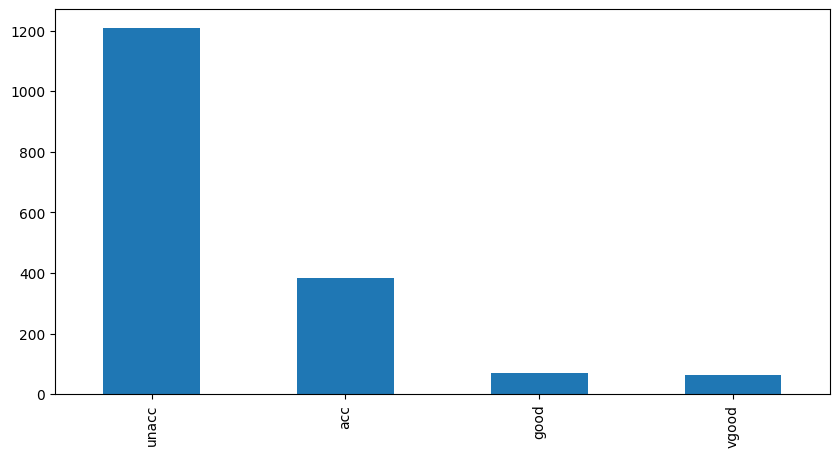

In [13]:
# visualize 
df['class'].value_counts().plot(kind='bar', figsize=(10, 5))

In [15]:
df.columns

Index(['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class'], dtype='object')

In [16]:
df.dtypes

buying      object
maint       object
doors       object
persons     object
lug_boot    object
safety      object
class       object
dtype: object

**Label Encoding**
+ Manual fixing
+ Label Encoder
+ One Hot Encoding
+ Get Dummies

In [17]:
buying_label = {ni: n for n, ni in enumerate(set(df['buying']))}
maint_label = {ni: n for n, ni in enumerate(set(df['maint']))}
doors_label = {ni: n for n, ni in enumerate(set(df['doors']))}
persons_label = {ni: n for n, ni in enumerate(set(df['persons']))}
lug_boot_label = {ni: n for n, ni in enumerate(set(df['lug_boot']))}
safety_label = {ni: n for n, ni in enumerate(set(df['safety']))}
class_label = {ni: n for n, ni in enumerate(set(df['class']))}

In [18]:
buying_label

{'high': 0, 'vhigh': 1, 'low': 2, 'med': 3}

In [19]:
df['buying'].unique()

array(['vhigh', 'high', 'med', 'low'], dtype=object)

In [22]:
print('buying_label = {}'.format(buying_label))
print("maint_label = {}".format(maint_label))
print("doors_label = {}".format(doors_label))
print("persons_label = {}".format(persons_label))
print("lug_boot_label = {}".format(lug_boot_label))
print("safety_label = {}".format(safety_label))
print("class_label = {}".format(safety_label))

buying_label = {'high': 0, 'vhigh': 1, 'low': 2, 'med': 3}
maint_label = {'high': 0, 'vhigh': 1, 'low': 2, 'med': 3}
doors_label = {'3': 0, '5more': 1, '2': 2, '4': 3}
persons_label = {'more': 0, '2': 1, '4': 2}
lug_boot_label = {'big': 0, 'small': 1, 'med': 2}
safety_label = {'high': 0, 'low': 1, 'med': 2}
class_label = {'high': 0, 'low': 1, 'med': 2}


In [23]:
df1 = df

In [24]:
df1

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good


In [25]:
df1['buying'] = df1['buying'].map(buying_label)

In [26]:
df1['maint'] = df1['maint'].map(maint_label)
df1['doors'] = df1['doors'].map(doors_label)
df1['persons'] = df1['persons'].map(persons_label)
df1['lug_boot'] = df1['lug_boot'].map(lug_boot_label)
df1['safety'] = df1['safety'].map(safety_label)
df1['class'] = df1['class'].map(class_label)

In [27]:
df1.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,1,1,2,1,1,1,2
1,1,1,2,1,1,2,2
2,1,1,2,1,1,0,2
3,1,1,2,1,2,1,2
4,1,1,2,1,2,2,2


Using Label Encoder

In [28]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()

In [29]:
df2 = df

In [30]:
for i in df2.columns:
    df2[i] = lb.fit_transform(df2[i])

In [31]:
df2.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,1,1,2,1,1,1,2
1,1,1,2,1,1,2,2
2,1,1,2,1,1,0,2
3,1,1,2,1,2,1,2
4,1,1,2,1,2,2,2


In [33]:
df1.dtypes

buying      int64
maint       int64
doors       int64
persons     int64
lug_boot    int64
safety      int64
class       int64
dtype: object

In [34]:
df2.dtypes

buying      int64
maint       int64
doors       int64
persons     int64
lug_boot    int64
safety      int64
class       int64
dtype: object

<Axes: >

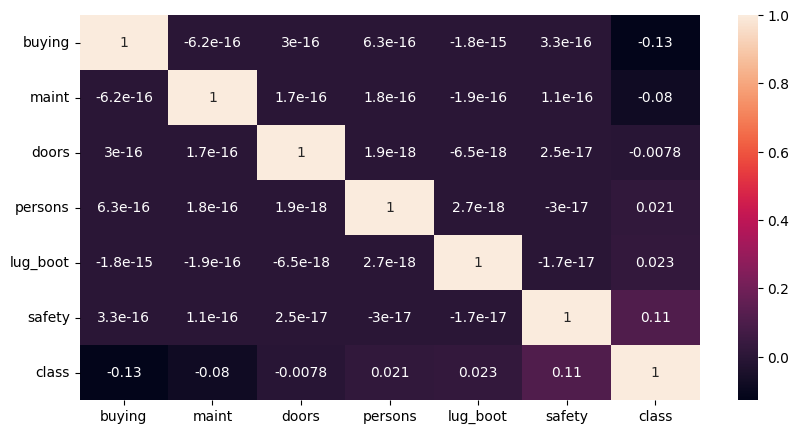

In [35]:
plt.figure(figsize=(10, 5))
sns.heatmap(df1.corr(), annot=True)

In [36]:
df1.describe()

,buying,maint,doors,persons,lug_boot,safety,class
count,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000,1728.00000
mean,1.500000,1.500000,1.500000,1.000000,1.000000,1.000000,2.10706
std,1.118358,1.118358,1.118358,0.816733,0.816733,0.816733,0.63355
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,0.750000,0.750000,0.750000,0.000000,0.000000,0.000000,2.00000
50%,1.500000,1.500000,1.500000,1.000000,1.000000,1.000000,2.00000
75%,2.250000,2.250000,2.250000,2.000000,2.000000,2.000000,2.00000
max,3.000000,3.000000,3.000000,2.000000,2.000000,2.000000,3.00000


In [37]:
df.columns

Index(['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class'], dtype='object')

In [39]:
Xfeatures = df1[['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety']]
ylabels = df1['class']

Split Dataset

In [40]:
X_train, X_test, Y_train, Y_test = train_test_split(Xfeatures, ylabels, test_size=0.2, random_state=7)

LogisticRegression
**************************
penality = l1 / l2 / elasticnet --> l1 + l2

L1 Regularization, also called a lasso regression, adds the “absolute value of magnitude” 
of the coefficient as a penalty term to the loss function. 

L2 Regularization, also called a ridge regression, adds the “squared magnitude” 
of the coefficient as the penalty term to the loss function

L1 regression, or Lasso regression is interestingly good at determining the important features within a dataset. 
This ability is derived from taking the absolute value of each of the models respective coefficients. 
It leads to the model shrinking unimportant features to near, or exactly zero. 
As for L2 regression, or Ridge regression , you should utilize it whenever you are simply needing to 
implement a regularized regression model. In implementing it you can further utilize a form of cross 
fold validation to iterate over a different set of alpha parameters, in order to define the optimal 
value for your model. Remember as a final word of wisdom. When hyper parameter tuning, or trying to 
assess the model, the alpha parameter is a metric utilized to define the models complexity. 
If the alpha value equals zero, then your model is tending to be overfit, and you are simply back to 
a standard OLS model, and if the alpha value is high then the model is tending to be underfit.



solver = ‘lbfgs’, ‘liblinear’, ‘newton-cg’, ‘newton-cholesky’, ‘sag’, ‘saga’
+ ‘lbfgs’ - [‘l2’, None]
+ ‘liblinear’ - [‘l1’, ‘l2’]
+ ‘newton-cg’ - [‘l2’, None]
+ ‘newton-cholesky’ - [‘l2’, None]
+ ‘sag’ - [‘l2’, None]
+ ‘saga’ - [‘elasticnet’, ‘l1’, ‘l2’, None]

In [52]:
# using - Logistic Regression
logit = LogisticRegression(penalty='l2', solver='lbfgs', tol=0.0001, C=1.0, fit_intercept=True, random_state=0)
logit.fit(X_train, Y_train)

LogisticRegression(random_state=0)

In [57]:
predictions_logit = logit.predict(X_test)
print("accuracy Score", accuracy_score(Y_test, predictions_logit))

accuracy Score 0.7138728323699421


In [58]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test, predictions_logit)

array([[  2,   0,  13,   0],
       [  0,   0,   8,   0],
       [  1,   0, 245,   0],
       [  1,   0,  76,   0]])

In [66]:
# using - Multinomial Navie bayes
nb = MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)
nb.fit(X_train, Y_train)
nb.get_params()

{'alpha': 1.0, 'class_prior': None, 'fit_prior': True, 'force_alpha': 'warn'}

In [61]:
predictions_nb = nb.predict(X_test)
print("accuracy Score", accuracy_score(Y_test, predictions_nb))

accuracy Score 0.7109826589595376


In [62]:
confusion_matrix(Y_test, predictions_nb)

array([[  0,   0,  15,   0],
       [  0,   0,   8,   0],
       [  0,   0, 246,   0],
       [  0,   0,  77,   0]])

In [65]:
# using - Multinomial Navie bayes
gb = GaussianNB()
gb.fit(X_train, Y_train)
gb.get_params()

{'priors': None, 'var_smoothing': 1e-09}

In [67]:
predictions_gb = gb.predict(X_test)
print("accuracy Score", accuracy_score(Y_test, predictions_gb))
confusion_matrix(Y_test, predictions_gb)

accuracy Score 0.615606936416185


array([[ 15,   0,   0,   0],
       [  6,   0,   2,   0],
       [ 48,   0, 198,   0],
       [ 30,   0,  47,   0]])

In [69]:
nn_clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1, max_iter=1000)
nn_clf.fit(X_train, Y_train)

MLPClassifier(alpha=1e-05, hidden_layer_sizes=(5, 2), max_iter=1000,
              random_state=1, solver='lbfgs')

In [70]:
predictions_nn = nn_clf.predict(X_test)
print("accuracy Score", accuracy_score(Y_test, predictions_nn))
confusion_matrix(Y_test, predictions_nn)

accuracy Score 0.8410404624277457


array([[  9,   0,   0,   6],
       [  4,   0,   1,   3],
       [  1,   0, 234,  11],
       [  2,   0,  27,  48]])

In [71]:
# save models
import joblib

logit_model = open('logit_car_model.pickle', 'wb')
joblib.dump(logit, logit_model)
logit_model.close()

nn_car_model = open('nn_car_model.pickle', 'wb')
joblib.dump(nn_clf, nn_car_model)
nn_car_model.close()

#### Interpreting Models
+ Eli5
+ logit_model
####
+ Create An Explanier
+ DeprecationWarning+ A class name [ name of targets/labels]
+ Model 
+ Function that will provide the predictions

In [74]:
import lime
import lime.lime_tabular

In [75]:
feature_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety']
print(df['class'].unique())
class_names = class_label
print(class_label)

[2 3 0 1]
{'vgood': 0, 'good': 1, 'unacc': 2, 'acc': 3}


In [77]:
explainer = lime.lime_tabular.LimeTabularExplainer(
    X_train.values, 
    feature_names=feature_names,
    class_names=class_names)

In [ ]:
exp = explainer.explain_instance(X_test.iloc[10], logit.predict_proba, num_features=6, top_labels=1)